In [21]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#treina e printa 3 métricas de erro
def treinao(df,model):
    if "NU_NOTA_MT" in df:
        X, y = df.drop("NU_NOTA_MT",axis=1),df["NU_NOTA_MT"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
        model.fit(X_train,y_train)
        preds = model.predict(X_test)
        print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, preds))))
        print("MSE: %f" % (np.square(np.subtract(y_test,preds)).mean()))
        print("r2: %f" % (r2_score(y_test,preds)))
        return model
    else:
        return model.predict(df)

In [23]:
# remove colunas anonimizadas
# tratamento de variaveis categoricas
def drop_modcat(df):
    anom_columns = ["NU_INSCRICAO","CO_PROVA_CN","CO_PROVA_CH","CO_PROVA_LC","CO_PROVA_MT","CO_UF_RESIDENCIA"]
    cat_variables = ["SG_UF_RESIDENCIA","TP_SEXO","Q001","Q002","Q006","Q024","Q025","Q026","Q027","Q047"]
    df.drop(anom_columns,axis=1,inplace=True)
    return pd.get_dummies(df, columns=cat_variables, drop_first=True)

In [24]:
df = pd.read_csv("train.csv")

In [25]:
# deixando somente campos que estão no dataset test
df = df[['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]

In [26]:
df.NU_NOTA_MT.isna().sum()

3597

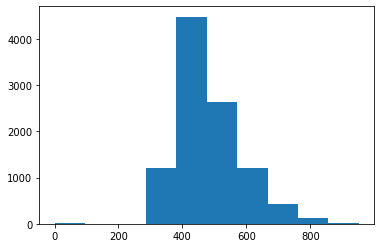

In [27]:
plt.hist(df.NU_NOTA_MT, bins=10)
plt.show()

In [28]:
df_dum = drop_modcat(df.copy())

In [29]:
df_0na = df_dum.copy()
df_0na["NU_NOTA_MT"].fillna(0,inplace=True)
df_Mna = df_dum.copy()
df_Mna.NU_NOTA_MT.fillna(df_Mna.NU_NOTA_MT.mean(),inplace=True)
df_NOna = df_dum[df_dum.NU_NOTA_MT.notnull()]

In [32]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 100)

In [35]:
model = treinao(df_Mna,xg_reg)

RMSE: 62.883421
MSE: 3954.324605
r2: 0.433683


In [40]:
df_test = pd.read_csv("test.csv")
df_dum1 = drop_modcat(df_test.copy())
preds = treinao(df_dum1,model)

In [42]:
z = pd.Series(preds,name="NU_NOTA_MT")
df_entrega = pd.concat([df_test.NU_INSCRICAO,z], axis=1)
df_entrega.to_csv("answer.csv",index=False)